In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pan
import PIL
from PIL import Image
import os
from os import path

In [3]:
train_dir_path = 'Train/'
test_dir_path = 'Test/'

# Données Train

### Modification des noms dans le dossier Train

In [4]:
counter = 1
for i in os.listdir(train_dir_path):
    if(path.isdir(path.join(train_dir_path,i))):
        os.rename(path.join(train_dir_path,i),path.join(train_dir_path,str(counter)))
        counter+=1

### Récupération des images dans le dossier Train

In [5]:
img_list = []
class_counter = 0
class_list = []
for i in os.listdir(train_dir_path):
    if(path.isdir(path.join(train_dir_path,i))):
        for j in os.listdir(path.join(train_dir_path,i)):
            if(j.endswith('.ppm')):
                class_list.append(class_counter)
                img_list.append(np.array(Image.open(os.path.join(os.path.join(train_dir_path,i),j)).resize((28, 28), PIL.Image.ANTIALIAS).crop((2,2,24,24))))
        class_counter +=1

# Données Test

### Modification des noms dans le dossier Test

In [6]:
counter = 1
for i in os.listdir(test_dir_path):
    if(path.isdir(path.join(test_dir_path,i))):
        os.rename(path.join(test_dir_path,i),path.join(test_dir_path,str(counter)))
        counter+=1

### Récupération des images dans le dossier Test

In [7]:
img_test_list = []
class_counter = 0
class_test_list = []
for i in os.listdir(test_dir_path):
    if(path.isdir(path.join(test_dir_path,i))):
        for j in os.listdir(path.join(test_dir_path,i)):
            if(j.endswith('.ppm')):
                class_test_list.append(class_counter)
                img_test_list.append(np.array(Image.open(os.path.join(os.path.join(test_dir_path,i),j)).resize((28, 28), PIL.Image.ANTIALIAS).crop((2,2,24,24))))
        class_counter +=1

# Découpage du jeux de données

In [16]:
X_train_images = np.array(img_list)

In [17]:
y_train_labels = np.array(class_list)

In [18]:
X_test_images = np.array(img_test_list)

In [19]:
y_test_labels = np.array(class_test_list)

# Normalisation

### Train

In [21]:
vol_shape = X_train_images.shape[:-1]

In [23]:
n_voxels = np.prod(vol_shape)

In [24]:
voxel_by_time = X_train_images.reshape(n_voxels,X_train_images.shape[-1])

In [25]:
scaler = StandardScaler()
X_train_images = scaler.fit_transform(voxel_by_time)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
X_train_images = X_train_images.reshape(4575,22,22,3)

In [32]:
X_train_images.shape

(4575, 22, 22, 3)

In [33]:
y_train_labels.shape

(4575,)

### Test

In [27]:
vol_shape = X_test_images.shape[:-1]

In [28]:
n_voxels = np.prod(vol_shape)

In [29]:
voxel_by_time = X_test_images.reshape(n_voxels,X_test_images.shape[-1])

In [30]:
scaler = StandardScaler()
X_test_images = scaler.fit_transform(voxel_by_time)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
X_test_images = X_test_images.reshape(2520,22,22,3)

In [34]:
X_test_images.shape

(2520, 22, 22, 3)

In [36]:
y_test_labels.shape

(2520,)

# Affichage 50 premières images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

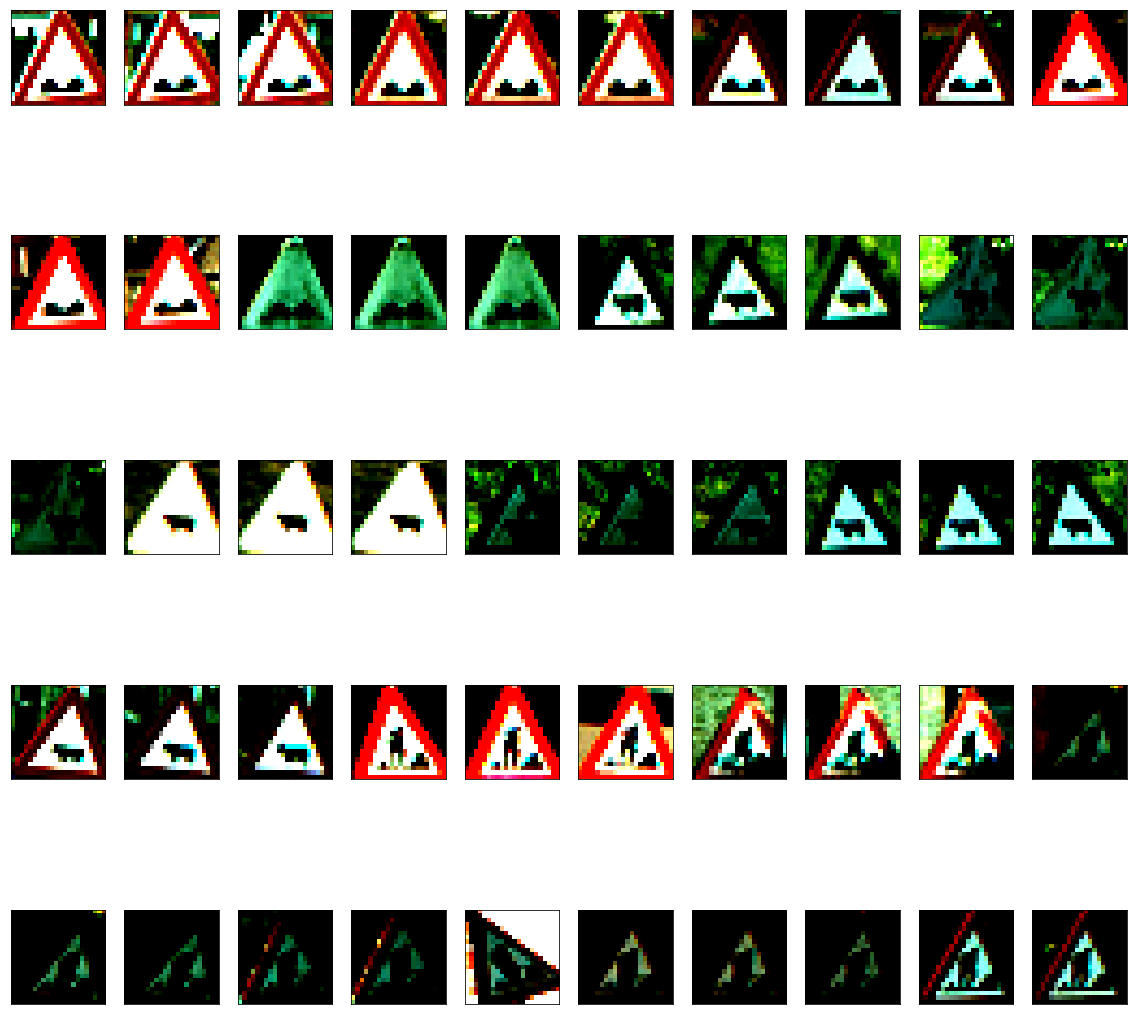

In [37]:
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_images[i])

# CNN

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [60]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(128,kernel_size=(6,6),input_shape=(22,22,3),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(256,kernel_size=(4,4),strides=2))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(62,activation='softmax'))

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 17, 17, 128)       13952     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 256)         524544    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

In [62]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [63]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=20),
    keras.callbacks.ModelCheckpoint('best_signaux.h5',save_best_only=True)
]

In [64]:
history = model.fit(X_train_images,y_train_labels,callbacks=callbacks,epochs=10,batch_size=32,validation_data=(X_test_images,y_test_labels))

Train on 4575 samples, validate on 2520 samples
Epoch 1/10
4575/4575 [==============================] - 7s 2ms/step - loss: 1.4123 - acc: 0.6581 - val_loss: 0.5065 - val_acc: 0.8710
Epoch 2/10
4575/4575 [==============================] - 7s 1ms/step - loss: 0.4141 - acc: 0.8855 - val_loss: 0.4569 - val_acc: 0.8841
Epoch 3/10
4575/4575 [==============================] - 7s 1ms/step - loss: 0.2529 - acc: 0.9290 - val_loss: 0.3848 - val_acc: 0.8905
Epoch 4/10
4575/4575 [==============================] - 7s 1ms/step - loss: 0.1919 - acc: 0.9434 - val_loss: 0.3360 - val_acc: 0.9230
Epoch 5/10
4575/4575 [==============================] - 7s 1ms/step - loss: 0.1698 - acc: 0.9502 - val_loss: 0.3583 - val_acc: 0.9151
Epoch 6/10
4575/4575 [==============================] - 6s 1ms/step - loss: 0.1866 - acc: 0.9495 - val_loss: 0.4473 - val_acc: 0.8964
Epoch 7/10
4575/4575 [==============================] - 6s 1ms/step - loss: 0.1128 - acc: 0.9687 - val_loss: 0.4154 - val_acc: 0.9115
Epoch 8/10
457

# Visualisation des résultats

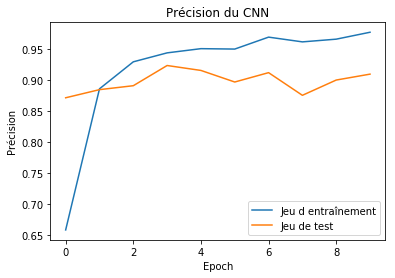

In [73]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Précision du CNN')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Jeu d entraînement', 'Jeu de test'])
plt.show()

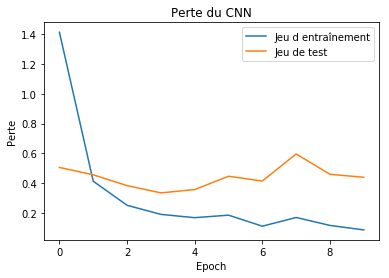

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte du CNN')
plt.ylabel('Perte')
plt.xlabel('Epoch')
plt.legend(['Jeu d entraînement', 'Jeu de test'])
plt.show()

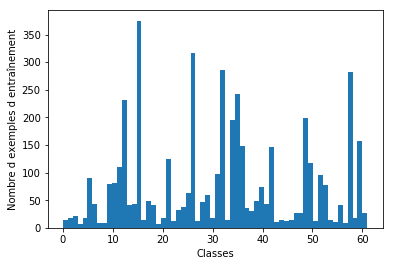

In [67]:
plt.hist(y_train_labels,62)
plt.xlabel("Classes")
plt.ylabel('Nombre d exemples d entraînement')
plt.show()

# Evaluation du meilleur modèle

In [70]:
model = keras.models.load_model('best_signaux.h5')
test_loss, test_acc = model.evaluate(X_test_images, y_test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

2520/2520 [==============================] - 1s 391us/step
Test accuracy: 0.9230158728266519
Test loss: 0.33602102328334854


In [71]:
prediction = model.predict(X_test_images)

In [72]:
model.predict_classes(X_test_images)

array([11,  0,  0, ...,  5, 61, 61], dtype=int64)

In [77]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

    
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(62), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


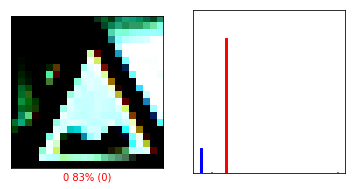

In [78]:
class_names = class_list
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction,y_test_labels,X_test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,y_test_labels)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

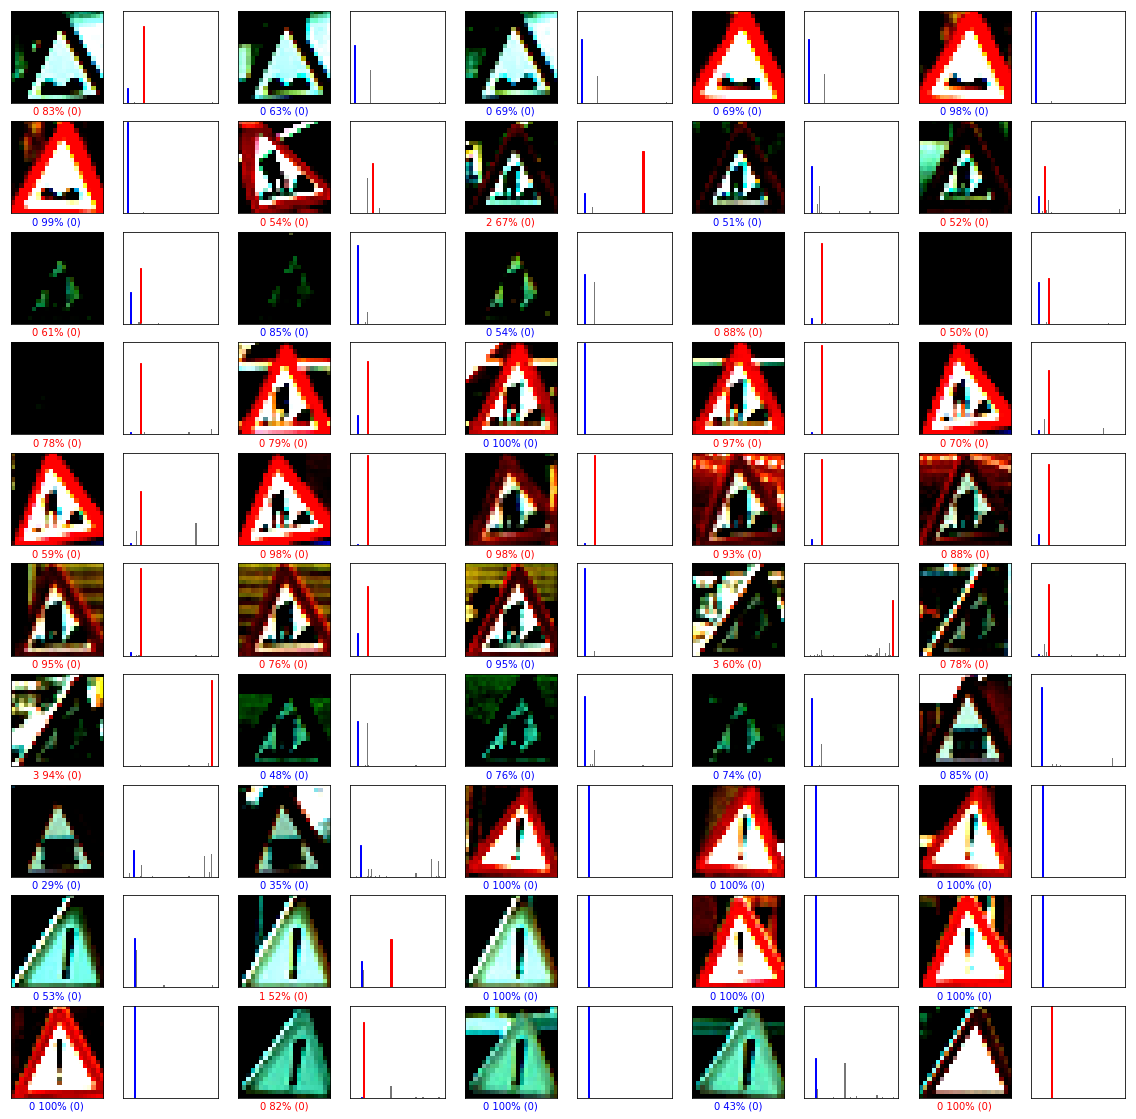

In [79]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, y_test_labels, X_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, y_test_labels)
plt.show()